# [作業目標]
- 使用 Day 12 剛學到的方法, 對較完整的資料生成離散化特徵
- 觀察上述離散化特徵, 對於目標值的預測有沒有幫助

# [作業重點]
- 仿照 Day 12 的語法, 將年齡資料 ('DAYS_BIRTH' 除以 365) 離散化
- 繪製上述的 "離散化標籤" 與目標值 ('TARGET') 的長條圖

In [69]:
# 載入需要的套件
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# 設定 data_path
dir_data = './data/'

### 之前做過的處理

In [70]:
# 讀取資料檔
f_app_train = os.path.join(dir_data, 'application_train.csv')
app_train = pd.read_csv(f_app_train)
app_train.shape
app_train.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [7]:
# 將只有兩種值的類別型欄位, 做 Label Encoder, 計算相關係數時讓這些欄位可以被包含在內
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

# 檢查每一個 column
for col in app_train:
    if app_train[col].dtype == 'object':
        # 如果只有兩種值的類別型欄位
        if len(list(app_train[col].unique())) <= 2:
            # 就做 Label Encoder, 以加入相關係數檢查
            app_train[col] = le.fit_transform(app_train[col])            
print(app_train.shape)
app_train.head()

(307511, 122)


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,0,M,0,1,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,0,F,0,0,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,1,M,1,1,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,0,F,0,1,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,0,M,0,1,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [8]:
# 受雇日數為異常值的資料, 另外設一個欄位記錄, 並將異常的日數轉成空值 (np.nan)
app_train['DAYS_EMPLOYED_ANOM'] = app_train["DAYS_EMPLOYED"] == 365243
app_train['DAYS_EMPLOYED'].replace({365243: np.nan}, inplace = True)

# 出生日數 (DAYS_BIRTH) 取絕對值 
app_train['DAYS_BIRTH'] = abs(app_train['DAYS_BIRTH'])

## 練習時間
參考 Day 12 範例程式，離散化你覺得有興趣的欄位，並嘗試找出有趣的訊息

In [13]:
app_train['NORM_AMT_INCOME'] = app_train['AMT_INCOME_TOTAL'] / (max(app_train['AMT_INCOME_TOTAL']) - min(app_train['AMT_INCOME_TOTAL']))
app_train['INT_GROUP'] = pd.cut(app_train['NORM_AMT_INCOME'],10)
toplot = app_train.groupby(['INT_GROUP','TARGET']).size()
print(toplot)

INT_GROUP         TARGET
(-0.000781, 0.1]  0         282684
                  1          24824
(0.1, 0.2]        0              2
(0.9, 1.0]        1              1
dtype: int64


In [88]:
# 受雇日數為異常值的資料, 另外設一個欄位記錄, 並將異常的日數轉成空值 (np.nan)
app_train['DAYS_EMPLOYED_ANOM'] = app_train["DAYS_EMPLOYED"] == 365243
app_train['DAYS_EMPLOYED'].replace({365243: np.nan}, inplace = True)
app_train['YEARS_EMPLOYED'] = abs(app_train['DAYS_EMPLOYED']) /365

Range
(0, 10]     201181
(10, 20]     38398
(20, 30]      9551
(30, 40]      2771
(40, 50]       234
dtype: int64
Range
(0, 10]     181990
(10, 20]     36281
(20, 30]      9122
(30, 40]      2675
(40, 50]       233
Name: 0, dtype: int64
Range
(0, 10]     19191
(10, 20]     2117
(20, 30]      429
(30, 40]       96
(40, 50]        1
Name: 1, dtype: int64
Range
(0, 10]     0.105451
(10, 20]    0.058350
(20, 30]    0.047029
(30, 40]    0.035888
(40, 50]    0.004292
Name: 1, dtype: float64


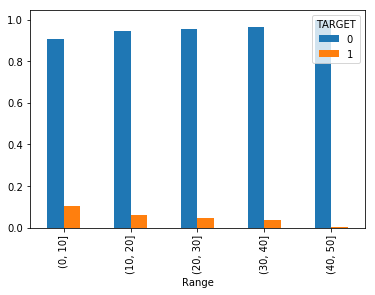

In [83]:
cut_name = 'Range'
cut_range = [0, 10, 20, 30, 40, 50]
app_train[cut_name] = pd.cut(app_train['YEARS_EMPLOYED'], cut_range)
toplot = app_train.groupby([cut_name,'TARGET'])['YEARS_EMPLOYED'].size()
toplot = toplot.unstack()
toplot['not'] = toplot[0] / (toplot[0] + toplot[1])
toplot['yes'] = toplot[1] / (toplot[0])
toplot[0] = toplot['not']
toplot[1] = toplot['yes']
toplot[[0,1]].plot.bar()
#聘僱日數越少的還不出來的比例似乎越高

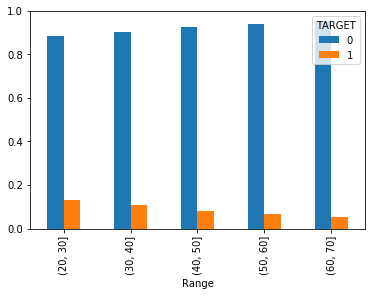

In [87]:
# 出生日數 (DAYS_BIRTH) 取絕對值 
app_train['DAYS_BIRTH'] = abs(app_train['DAYS_BIRTH'])
app_train['YEARS_BIRTH'] = app_train['DAYS_BIRTH'] / 365
cut_name = 'Range'
cut_range = [20, 30, 40, 50, 60, 70]
app_train[cut_name] = pd.cut(app_train['YEARS_BIRTH'], cut_range)
toplot = app_train.groupby([cut_name,'TARGET'])['YEARS_BIRTH'].size()
toplot = toplot.unstack()
toplot['not'] = toplot[0] / (toplot[0] + toplot[1])
toplot['yes'] = toplot[1] / (toplot[0])
toplot[0] = toplot['not']
toplot[1] = toplot['yes']
toplot[[0,1]].plot.bar()
#還款能力和年紀也有點關係，年紀越高還款能力差的人比例佔那個年齡越少

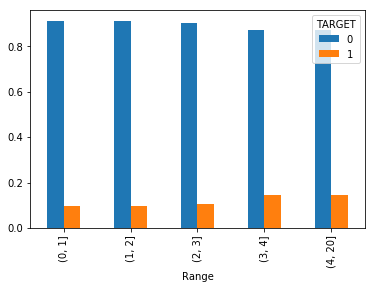

In [119]:
cut_col = 'CNT_CHILDREN'
cut_name = 'Range'
cut_range = [0, 1, 2, 3 ,4, 20]
app_train[cut_name] = pd.cut(app_train[cut_col], cut_range)
toplot = app_train.groupby([cut_name,'TARGET'], as_index=False).size()
toplot = toplot.unstack()
toplot['not'] = toplot[0] / (toplot[0] + toplot[1])
toplot['yes'] = toplot[1] / (toplot[0])
toplot[0] = toplot['not']
toplot[1] = toplot['yes']
toplot[[0,1]].plot.bar()
#小孩越多還款能力也越差啊... 小孩真可怕

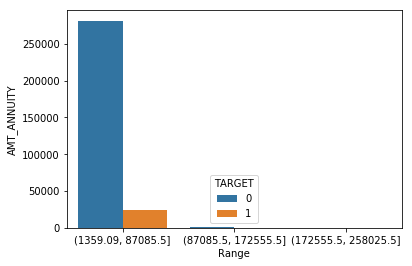